<a href="https://colab.research.google.com/github/Himanshu0518/sentiment_analysis/blob/main/sentiment_analysis_on_IMDB_reviews_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Data Collection from IMDB reviews dataset**

In [ ]:
!kaggle datasets download -d vishakhdapat/imdb-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/vishakhdapat/imdb-movie-reviews
License(s): MIT
 35% 9.00M/25.7M [00:00<00:00, 84.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 158MB/s] 


In [ ]:
from zipfile import ZipFile
dataset = '/content/imdb-movie-reviews.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


**Data Collection from rotten Tomato Dataset**

In [ ]:
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
License(s): CC0-1.0
100% 77.0M/77.2M [00:00<00:00, 130MB/s]
100% 77.2M/77.2M [00:00<00:00, 125MB/s]


In [ ]:
dataset = '/content/rotten-tomatoes-movies-and-critic-reviews-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/imdb-movie-reviews.zip')

In [ ]:
temp_df = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
temp_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [ ]:
df1 = temp_df[["review_content", "review_type"]]
df1.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,Fresh
1,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh
2,With a top-notch cast and dazzling special eff...,Fresh
3,Whether audiences will get behind The Lightnin...,Fresh
4,What's really lacking in The Lightning Thief i...,Rotten


In [ ]:
df.columns = ['text','sentiments']

In [ ]:
df1.columns = ['text','sentiments']

In [ ]:
df.head()

,text,sentiments
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df1.head()

,text,sentiments
0,A fantasy adventure that fuses Greek mythology...,Fresh
1,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh
2,With a top-notch cast and dazzling special eff...,Fresh
3,Whether audiences will get behind The Lightnin...,Fresh
4,What's really lacking in The Lightning Thief i...,Rotten


In [ ]:

import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
# removing the html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext

# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)


In [ ]:
df['cleaned_text']=pd.DataFrame(df.text.apply(cleaned_html))
df['cleaned_text']=pd.DataFrame(df.cleaned_text.apply(cleaned1))
df['cleaned_text']=pd.DataFrame(df.cleaned_text.apply(cleaned2))

In [ ]:
df1['text'] = df1['text'].astype(str)

<ipython-input-22-e6f52eb2cc4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].astype(str)


In [ ]:
df1['cleaned_text'] = pd.DataFrame(df1.text.apply(cleaned_html))
df1['cleaned_text'] = pd.DataFrame(df1.cleaned_text.apply(cleaned1))
df1['cleaned_text'] = pd.DataFrame(df1.cleaned_text.apply(cleaned2))

<ipython-input-23-857adb3a5148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_text'] = pd.DataFrame(df1.text.apply(cleaned_html))
<ipython-input-23-857adb3a5148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_text'] = pd.DataFrame(df1.cleaned_text.apply(cleaned1))
<ipython-input-23-857adb3a5148>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df.head()

,text,sentiments,cleaned_text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [ ]:
df1.head()

,text,sentiments,cleaned_text
0,A fantasy adventure that fuses Greek mythology...,Fresh,a fantasy adventure that fuses greek mythology...
1,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,uma thurman as medusa the gorgon with a coiffu...
2,With a top-notch cast and dazzling special eff...,Fresh,with a topnotch cast and dazzling special effe...
3,Whether audiences will get behind The Lightnin...,Fresh,whether audiences will get behind the lightnin...
4,What's really lacking in The Lightning Thief i...,Rotten,whats really lacking in the lightning thief is...


In [ ]:
df.isnull().sum()

,0
text,0
sentiments,0
cleaned_text,0


In [ ]:
df1.isnull().sum()

,0
text,0
sentiments,0
cleaned_text,0


In [ ]:
df.shape

(50000, 3)

In [ ]:
df1.shape

(1130017, 3)

In [ ]:
# Check if there are any empty strings
empty_string_count = (df1['text'] == '').sum()
print(f"Empty string count: {empty_string_count}")

# Check if there are any placeholder strings like 'None', 'nan', etc.
placeholder_count = df1['text'].isin(['nan', 'None', 'NULL', '']).sum()
print(f"Placeholder count: {placeholder_count}")


Empty string count: 0
Placeholder count: 65806


In [ ]:
import numpy as np

# Replace placeholder strings with actual NaN
df1['text'].replace(['nan', 'None', 'NULL', ''], np.nan, inplace=True)


<ipython-input-26-37bc392e6149>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['text'].replace(['nan', 'None', 'NULL', ''], np.nan, inplace=True)
<ipython-input-26-37bc392e6149>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'].replace(['nan', 'None', 'NULL', ''], np.nan, inplace=True)


In [ ]:
# Strip whitespace and check if there are any purely whitespace entries
whitespace_count = (df1['text'].str.strip() == '').sum()
print(f"Whitespace-only entries: {whitespace_count}")

# Replace whitespace-only strings with NaN
df1['text'] = df1['text'].replace(r'^\s*$', np.nan, regex=True)


Whitespace-only entries: 0


<ipython-input-27-328e9653666d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].replace(r'^\s*$', np.nan, regex=True)


In [ ]:
# Check missing values after replacement
missing_values_count = df1['text'].isnull().sum()
print(f"Missing values count in 'text' column: {missing_values_count}")


Missing values count in 'text' column: 65806


**Droping the missing values**

In [ ]:
df1.dropna(subset=['text'],inplace=True)

<ipython-input-29-057f52f60439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['text'],inplace=True)


In [ ]:
# Check missing values after droping
missing_values_count = df1['text'].isnull().sum()
print(f"Missing values count in 'text' column: {missing_values_count}")

Missing values count in 'text' column: 0


In [ ]:
positive_reviews = df1[df1['sentiments'] == 'Fresh']
negative_reviews = df1[df1['sentiments'] == 'Rotten']
positive_reviews.shape, negative_reviews.shape

((681035, 3), (383176, 3))

In [ ]:
positive_reviews = positive_reviews.iloc[:50000]
negative_reviews = negative_reviews.iloc[:50000]
print(positive_reviews.shape, negative_reviews.shape)
df1 = pd.concat([positive_reviews, negative_reviews])
df1.shape

(50000, 3) (50000, 3)


(100000, 3)

In [ ]:
df['sentiments'].value_counts()

,count
sentiments,
positive,25000
negative,25000


In [ ]:
df1['sentiments'].value_counts()

,count
sentiments,
Fresh,50000
Rotten,50000


In [ ]:
df1.head()

,text,sentiments,cleaned_text
0,A fantasy adventure that fuses Greek mythology...,Fresh,a fantasy adventure that fuses greek mythology...
1,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,uma thurman as medusa the gorgon with a coiffu...
2,With a top-notch cast and dazzling special eff...,Fresh,with a topnotch cast and dazzling special effe...
3,Whether audiences will get behind The Lightnin...,Fresh,whether audiences will get behind the lightnin...
7,"Percy Jackson isn't a great movie, but it's a ...",Fresh,percy jackson isnt a great movie but its a goo...


In [ ]:
import tqdm
from tqdm import tqdm

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 141605
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          100000 non-null  object
 1   sentiments    100000 non-null  object
 2   cleaned_text  100000 non-null  object
dtypes: object(3)
memory usage: 3.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          50000 non-null  object
 1   sentiments    50000 non-null  object
 2   cleaned_text  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
df1["label"] = df1["sentiments"].apply(lambda x: 1 if x == "Fresh" else 0)
df1.head()

,text,sentiments,cleaned_text,label
0,A fantasy adventure that fuses Greek mythology...,Fresh,a fantasy adventure that fuses greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,uma thurman as medusa the gorgon with a coiffu...,1
2,With a top-notch cast and dazzling special eff...,Fresh,with a topnotch cast and dazzling special effe...,1
3,Whether audiences will get behind The Lightnin...,Fresh,whether audiences will get behind the lightnin...,1
7,"Percy Jackson isn't a great movie, but it's a ...",Fresh,percy jackson isnt a great movie but its a goo...,1


In [ ]:
df["label"] = df["sentiments"].apply(lambda x: 1 if x == "positive" else 0)
df.head()

,text,sentiments,cleaned_text,label
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1


In [ ]:
df.head()

,text,sentiments,cleaned_text,label
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
port_stem = PorterStemmer()

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
print('not' in stopwords.words('english'))

True


In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(stemming)

In [ ]:
df1['cleaned_text'] = df1['cleaned_text'].apply(stemming)

In [ ]:
X = df["cleaned_text"]
y = df["label"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(train_y)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: label, Length: 40000, dtype: int64


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_x)

train_x_sequences = tokenizer.texts_to_sequences(train_x)
test_x_sequences = tokenizer.texts_to_sequences(test_x)

max_length = 100
train_x_padded = pad_sequences(train_x_sequences, maxlen=max_length, padding='post', truncating='post')
test_x_padded = pad_sequences(test_x_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
train_x_tomato = df1["cleaned_text"]
tokenizer.fit_on_texts(train_x_tomato)
train_x_tomato_sequences = tokenizer.texts_to_sequences(train_x_tomato)
train_x_tomato_padded = pad_sequences(train_x_tomato_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
vocab_size = 10000  #
embedding_dim = 100
max_sequence_length = 100

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

model.add(LSTM(128, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.build((None, max_sequence_length))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,248,961 (4.76 MB)

 Trainable params: 1,248,961 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_x_padded, train_y, epochs=5, batch_size=32, validation_data=(test_x_padded, test_y))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 511s 406ms/step - accuracy: 0.5548 - loss: 0.6767 - val_accuracy: 0.6299 - val_loss: 0.6537
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 493s 395ms/step - accuracy: 0.6621 - loss: 0.6004 - val_accuracy: 0.8408 - val_loss: 0.3737
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 509s 400ms/step - accuracy: 0.8586 - loss: 0.3374 - val_accuracy: 0.8569 - val_loss: 0.3317
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 498s 397ms/step - accuracy: 0.8837 - loss: 0.2891 - val_accuracy: 0.8602 - val_loss: 0.3196
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 498s 397ms/step - accuracy: 0.8837 - loss: 0.2891 - val_accuracy: 0.8602 - val_loss: 0.3196
Epoch 5/5
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 509s 403ms/step - accuracy: 0.8972 - loss: 0.2595 - val_accuracy: 0.8646 - val_loss: 0.3279
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 509s 403ms/step - accuracy: 0.8972 - loss: 0.2595 - val_accuracy: 0.8646 - val_loss: 0.3279


In [ ]:
val_loss, val_accuracy = model.evaluate(test_x_padded, test_y)
print(f'Accuracy: {val_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.8682 - loss: 0.3250
Accuracy: 0.8646000027656555


In [ ]:
loss, accuracy = model.evaluate(train_x_padded, train_y)
print(f'Accuracy: {accuracy}')

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 160s 128ms/step - accuracy: 0.9222 - loss: 0.2088
Accuracy: 0.9214000105857849


In [ ]:
y_pred = model.predict(test_x_padded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step


In [ ]:
# Access training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

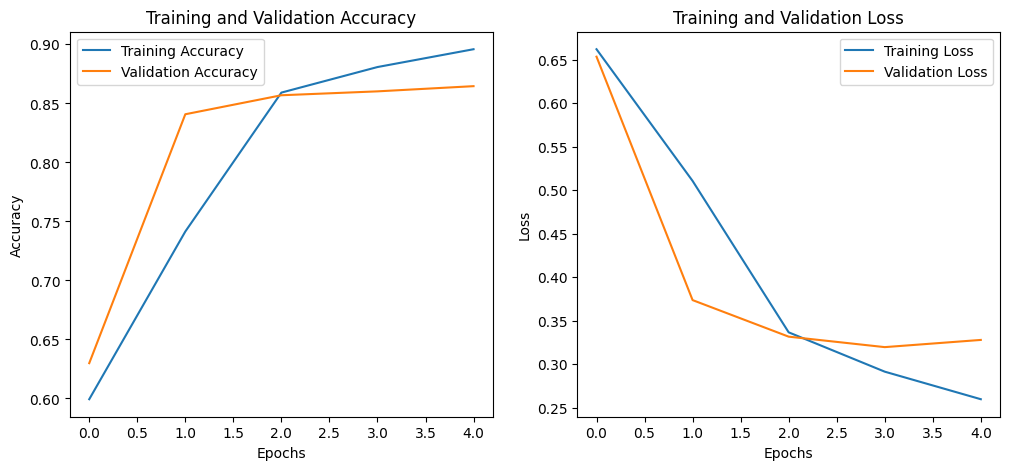

In [ ]:

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Add this import statement


In [ ]:
y_pred[0:5]

array([[0.12395529],
       [0.9293676 ],
       [0.03226045],
       [0.9653378 ],
       [0.32749668]], dtype=float32)

In [ ]:
y_pred_labels = np.where(y_pred > 0.5, 1, 0)
confusion_matrix(test_y, y_pred_labels)

array([[4216,  745],
       [ 609, 4430]])

<Axes: >

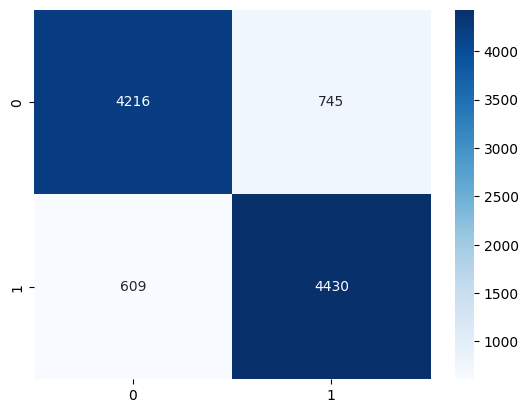

In [ ]:
sns.heatmap(confusion_matrix(test_y, y_pred_labels),annot = True , fmt = 'd',cmap = 'Blues')

# Making a predective system

In [ ]:
def predict(review):
  review = cleaned_html(review)
  review = cleaned1(review)
  review = cleaned2(review)
  review = stemming(review)
  print(review)
  review = [review]
  review_sequences = tokenizer.texts_to_sequences(review)
  review_padded = pad_sequences(review_sequences, maxlen=max_length, padding='post', truncating='post')
  prediction = model.predict(review_padded)
  print(prediction)
  if prediction > 0.5:
    return "Positive"
  else:
    return "Negative"

In [ ]:
review = df.iloc[0]['text']
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df.iloc[0]

,0
text,One of the other reviewers has mentioned that ...
sentiments,positive
cleaned_text,one review mention watch oz episod youll hook ...
label,1


In [ ]:
predict(review)

one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comf

'Positive'

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_y, y_pred_labels, target_names=['Negative', 'Positive'])
print(report)


              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86      4961
    Positive       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
import pickle

In [ ]:
model.save('movie_reviews_model.keras')

In [ ]:
# Save  the weights
model.save_weights('movie_reviews_weights.weights.h5')


In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# Load the tokenizer
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)


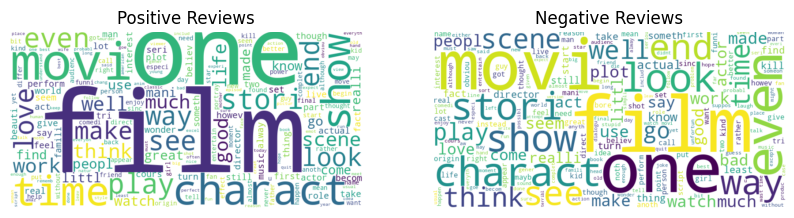

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Filter for positive and negative reviews
positive = df[df['label'] == 1]
negative = df[df['label'] == 0]


Positive_reviews = ' '.join(positive['cleaned_text'])
Negative_reviews = ' '.join(negative['cleaned_text'])


wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(Positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(Negative_reviews)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

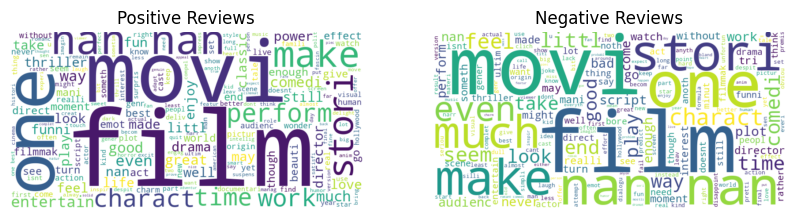

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Filter for positive and negative reviews
positive = df1[df1['label'] == 1]
negative = df1[df1['label'] == 0]


Positive_reviews = ' '.join(positive['cleaned_text'])
Negative_reviews = ' '.join(negative['cleaned_text'])


wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(Positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(Negative_reviews)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
text = "The movie was poor ,the acting was also poor."

sentiment = analyzer.polarity_scores(text)
print(sentiment)


{'neg': 0.47, 'neu': 0.53, 'pos': 0.0, 'compound': -0.7351}


In [ ]:
predict(text)

movi poor act also poor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.9477073]]


'Positive'

# Test another dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Movies_Reviews_modified_version1.csv', engine='python')

In [ ]:
df.head()

,Unnamed: 0,Ratings,Reviews,movie_name,Resenhas,genres,Description,emotion
0,0,3.0,"It had some laughs, but overall the motivation...",Waiting to Exhale,"Riu algumas risadas, mas no geral a motivação ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
1,1,4.0,"WAITING TO EXHALE Waiting, and waiting, and wa...",Waiting to Exhale,"ESPERANDO PARA EXALAR Esperando, e esperando, ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
2,2,4.0,"Angela Basset was good as expected, but Whitne...",Waiting to Exhale,"Angela Basset foi boa como o esperado, mas Whi...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
3,3,5.0,"The movie is okay, mediocre might even be the ...",Waiting to Exhale,"O filme é bom, medíocre pode até ser a palavra...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation
4,4,5.0,I got an opportunity to see Waiting To Exhale ...,Waiting to Exhale,Tive a oportunidade de ver Waiting To Exhale p...,"['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",anticipation


In [ ]:
df['emotion'].value_counts()

,count
emotion,
sadness,17339
joy,7861
anticipation,7336
optimism,4812
anger,3638
fear,3460
disgust,1670
surprise,57


In [ ]:
df['emotion'].replace({'anticipation':1,'optimism':1,'anger':0,'sadness':0,'fear':0,'disgust':0,'joy':1,'surprise':1},inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Ratings,Reviews,movie_name,Resenhas,genres,Description,emotion
0,0,3.0,"It had some laughs, but overall the motivation...",Waiting to Exhale,"Riu algumas risadas, mas no geral a motivação ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",1
1,1,4.0,"WAITING TO EXHALE Waiting, and waiting, and wa...",Waiting to Exhale,"ESPERANDO PARA EXALAR Esperando, e esperando, ...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",1
2,2,4.0,"Angela Basset was good as expected, but Whitne...",Waiting to Exhale,"Angela Basset foi boa como o esperado, mas Whi...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",1
3,3,5.0,"The movie is okay, mediocre might even be the ...",Waiting to Exhale,"O filme é bom, medíocre pode até ser a palavra...","['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",1
4,4,5.0,I got an opportunity to see Waiting To Exhale ...,Waiting to Exhale,Tive a oportunidade de ver Waiting To Exhale p...,"['Comedy', 'Drama', 'Romance']","Based on Terry McMillan's novel, this film fol...",1


In [ ]:
pos_df = df[df['emotion'] == 1]
neg_df = df[df['emotion'] == 0]

In [ ]:
pos_df.shape,neg_df.shape

((20066, 8), (26107, 8))

In [ ]:
df = pd.concat([pos_df[:50],neg_df[:50]] , axis = 0)

In [ ]:
df['emotion'].value_counts()

,count
emotion,
1,50
0,50


In [ ]:
from keras.models import load_model
model = load_model('movie_reviews_model.keras')

In [ ]:
df['stemmed_reviews'] = df['Reviews'].apply(stemming)

In [ ]:
X = df['Reviews'].values
Y = df['emotion'].values

In [ ]:
tokenizer = Tokenizer(num_words = 5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

train_x_sequences = tokenizer.texts_to_sequences(X)

max_length = 100
train_x_padded = pad_sequences(train_x_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
res = model.predict(train_x_padded)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


In [ ]:
type(res)

numpy.ndarray

In [ ]:
pos = 0
neg = 0 ;
for r in res:
  if r > 0.5:
    pos += 1
  else:
    neg += 1

In [ ]:
pos_percent = (pos/len(res))*100
neg_percent = (neg/len(res))*100

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

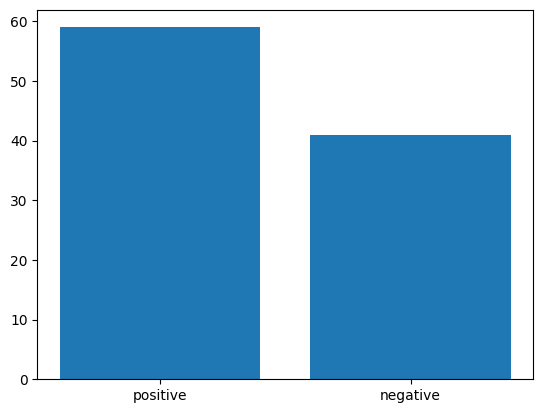

In [ ]:
plt.bar(x = ['positive','negative'], height = [pos_percent,neg_percent])

In [ ]:
from google.colab import files
df.to_csv('test_dataset.csv', index=False)
files.download('test_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>